In [ ]:
# import settings and functions
%run ./../../../imports.ipynb


Imports finished! :D


In [ ]:
# regular sparse
prefix = "c5_brick_regular_sparse_ref_"
csv_name = 'dataset_regular_sparse_scaled.csv'

# # regular semidense
# prefix = "c5_brick_regular_semidense_ref_"
# csv_name = 'dataset_regular_semidense_scaled.csv'

# regular dense
prefix = "c5_brick_regular_dense_ref_"
csv_name = 'dataset_regular_dense_scaled.csv'

# # random noisy
# prefix = "c5_brick_random_noisy_ref_"
# csv_name = 'dataset_random_dense_noisy_scaled.csv'


run_test = True
run_analysis = True

# run_test = False
# run_analysis = False

color_lims = True
# color_lims = False

In [ ]:

!cp ./../../../datasets_brick/scaling.in .
!cp ./../../../datasets_brick/regular/{csv_name} .

scal = np.genfromtxt('./scaling.in')
scaling = scal
print(scaling)

[0.01271666 0.01142857]


## Analysis setup

In [ ]:
# which executable?

# exe = data_driven_diffusion_snes
exe = hdiv_data_driven_diffusion_snes
# exe = hdiv_diffusion
sumanalys = "sumanalys.csv"
ana_name = "ana_DD_brick"

ana_compare_exe = [hdiv_data_driven_diffusion_snes]
ana_compare_name = ["ana_hdiv_DD_brick"]
ana_compare_sum = ["sumanalys.csv"]

# ana_compare_exe = [hdiv_diffusion, classic_diffusion]
# ana_compare_name = ["ana_brick_mixed", "ana_brick_classic"]
# ana_compare_sum = ["sumanalys.csv", "FEM_errors.csv"]

# Convergence analysis parameters
order_list = [1, 2, 3] # approximation order p
# elem_size_list = [0.5, 0.2, 0.1, 0.05, 0.02] # element size h
# order_list = [1, 2, 3] # approximation order p
# elem_size_list = [0.5, 0.2, 0.1, 0.05] # element size h
params.triangle_mesh = True
params.nproc = 1 # number of processors
jumps = ""
if params.nproc == 1:
    jumps = "-get_jumps"
# jumps = "-get_jumps"

naming = ["order", "gaussnum", "iterations","volume", "datanum","rmsPoiErr", "errorEstimator",
          "L2norm", "H1seminorm","fluxErr", "orderRefinementCounter", "errorIndicatorGrad", "errorIndicatorDiv", "jumpL2", "jumpHdiv", "eleNum"]
# naming = ["order", "gaussnum", "iterations","volume", "datanum","rmsPoiErr", "errorEstimator",
#           "L2norm", "H1seminorm","fluxErr", "orderRefinementCounter"]

error_name_list = ["L2norm", "H1seminorm", "fluxErr"]
error_label_list = [(r'Global error $L^2$-norm'),
               (r'Global error $H^1$-seminorm'), (r'Global Flux error')]

In [ ]:
params.conductivity = 1.0 # linear conductivity
params.element_size = 0.2 # element size in the regular mesh
# params.element_size = elem_size_list[0] # element size in the regular mesh
params.order = 2 # approximation order for displacements

# params.triangle_mesh = False # use triangular mesh

# Pre-processing parameters
params.mesh_file = "L_shape"
params.length_x = 1
params.length_y = 1
params.length_z = 0
params.show_mesh = True


# solution parameters
params.log_file = "log" # log file name 


### New brick meshes

In [ ]:
params.list_mesh_files = []
params.element_sizes = []

params.list_mesh_files.append("./../brick_20.cub")
params.element_sizes.append(5)

params.list_mesh_files.append("./../brick_15.cub")
params.element_sizes.append(4)

params.list_mesh_files.append("./../brick_10.cub")
params.element_sizes.append(3)

params.list_mesh_files.append("./../brick_7.cub")
params.element_sizes.append(2)

params.list_mesh_files.append("./../brick_6.cub")
params.element_sizes.append(1)

params.list_mesh_files.append("./../brick_4.cub")
params.element_sizes.append(1)

params.list_mesh_files.append("./../brick_q.cub")
params.element_sizes.append(10)

# which mesh to use
input_number = 6

In [ ]:
h = params.element_sizes
cub_names = params.list_mesh_files
input_names = []
for i in cub_names:
    input_names.append(i[:-3]+"h5m")
count = len(h)
print(cub_names)
print(input_names)

['./../brick_20.cub', './../brick_15.cub', './../brick_10.cub', './../brick_7.cub', './../brick_6.cub', './../brick_4.cub', './../brick_q.cub']
['./../brick_20.h5m', './../brick_15.h5m', './../brick_10.h5m', './../brick_7.h5m', './../brick_6.h5m', './../brick_4.h5m', './../brick_q.h5m']


In [ ]:
# # %%capture
# # partition the mesh
# for i in range(count):
#     # print(i)
#     !{tools_dir}/mofem_part -my_file {cub_names[i]} -output_file {input_names[i]} -my_nparts 1 -dim 2 -adj_dim 1

## Run test

In [ ]:
# start display for showing results
display = Display(backend="xvfb", visible=False, size=(1024, 768))
display.start()

In [ ]:
# # Testing mesh generation
# if run_test:
#     params.show_mesh = True
#     generate_config(params)
#     generate_mesh(params)

In [ ]:
# -csv_tree_file data_VGQ_generated_scaled.csv

params.csv_tree_file = csv_name

In [ ]:

# a = 134.0
# b = -0.1047
# c = 3.719 *10**(-5)

# nonlinear_a = a
# nonlinear_b = b
# nonlinear_c = c


# if run_test:
#     !rm out*
#     params.part_file = input_names[0]
#     !{diffusion_nonlinear_graphite} -file_name {params.part_file} -my_order 2 -nonlinear_a {nonlinear_a} -nonlinear_b {nonlinear_b} -nonlinear_c {nonlinear_c} -scaling 0
#     !convert.py out*

In [ ]:
# Testing running analysis


# exe = hdiv_diffusion
# # exe = classic_diffusion
# # exe = data_driven_diffusion
# # # exe = data_driven_diffusion_snes
# exe = hdiv_data_driven_diffusion_snes
# # exe = hdiv_data_driven_diffusion

if run_test:

    refinement_style = 3
    ref_iter_num = 4
    ref_control = 2.0
    params.nproc = 1


    # tolerance for distance for order ref
    tol_dist = "-tol_distance_ref 1.0 -tol_distance_var_ref 2.0 -tol_distance_var_ave 0.5 -refine_h_boundary_only -ref_control_mesh 4.0"
    # tol_dist = "-refine_h_boundary_only"

    print_integ = "-print_integ"

    !rm out*[0-9]*
    params.part_file = input_names[input_number]
    params.mesh_file = cub_names[input_number]
    # params.part_file = params.mesh_file[:-4] + "_" + str(params.nproc) + "p.h5m"
    !{mofem_part} -my_file {params.mesh_file} -nparts {params.nproc} -output_file {params.part_file} -dim 2 -adj_dim 1
    !mpirun -np {params.nproc} {exe} -file_name {params.part_file} -my_order {params.order} {jumps} -csv_tree_file {params.csv_tree_file} -scaling 1 -snes_max_it 500 -point_dist_tol 1e-5   -refinement_style {refinement_style} -ref_iter_num {ref_iter_num} -ref_control {ref_control} {print_integ} -use_line {tol_dist}
    #  -use_line -data_dim 4 -my_dummy_k 100.0



[0] <inform> MoFEM version 0.14.0 (MOAB 5.5.0 Petsc Release Version 3.16.6, Mar 30, 2022 )
[0] <inform> git commit id c8dfd486983b6cce1ab0f77eedb54e0da63082db
[0] <inform> Local time: 2024-7-31 15:30:42
[0] <inform> UTC time: 2024-7-31 15:30:42
[0] <inform> [MeshsetMng] meshset in database meshset 12682136550675316782 type BLOCKSET UNKNOWNNAME msId 1 name FLUX_UNIFORM_0 block header:  blockCol = 4294967295 blockMat = 0 blockDimension = 1
[0] <inform> [MeshsetMng] meshset in database meshset 12682136550675316783 type BLOCKSET UNKNOWNNAME msId 2 name PRESSURE_UNIFORM_1000 block header:  blockCol = 4294967295 blockMat = 0 blockDimension = 1
[0] <inform> [MeshsetMng] meshset in database meshset 12682136550675316784 type BLOCKSET UNKNOWNNAME msId 3 name FLUX_UNIFORM_OUT” block header:  blockCol = 4294967295 blockMat = 0 blockDimension = 1
[0] <inform> [MeshsetMng] meshset in database meshset 12682136550675316785 type BLOCKSET UNKNOWNNAME msId 6 name DOMAIN block header:  blockCol = 42949672

In [ ]:
name_vtk_integ = prefix+"out_integ_pts"
name_vtk_result = prefix+"out_result"
name_vtk_error = prefix+"out_error"
name_vtk_moab = prefix+"out_moab"

print(name_vtk_integ)

get_gifs = True
if get_gifs:
    !convert.py out*

c5_brick_regular_sparse_ref_out_integ_pts
 |██████████████████████████████████████████████████| 100.0% (53 of 53)



In [ ]:
if run_test:    
    out_to_vtk = !ls -c1 out_integ_pts_*.h5m
    last_file=out_to_vtk[0]
    !mbconvert {last_file} {name_vtk_integ}.vtk

    out_to_vtk = !ls -c1 out_result*.h5m
    last_file=out_to_vtk[0]
    !mbconvert {last_file} {name_vtk_result}.vtk

    out_to_vtk = !ls -c1 out_error*.h5m
    last_file=out_to_vtk[0]
    !mbconvert {last_file} {name_vtk_error}.vtk
    # !mbconvert out_moab_5.h5m {name_vtk_moab}.vtk
    !rm out_*h5m

Read "out_integ_pts_20.h5m"
Wrote "c5_brick_regular_sparse_ref_out_integ_pts.vtk"
Read "out_result_0.h5m"
Wrote "c5_brick_regular_sparse_ref_out_result.vtk"
Read "out_error_4.h5m"
Wrote "c5_brick_regular_sparse_ref_out_error.vtk"


ERROR_ESTIMATOR


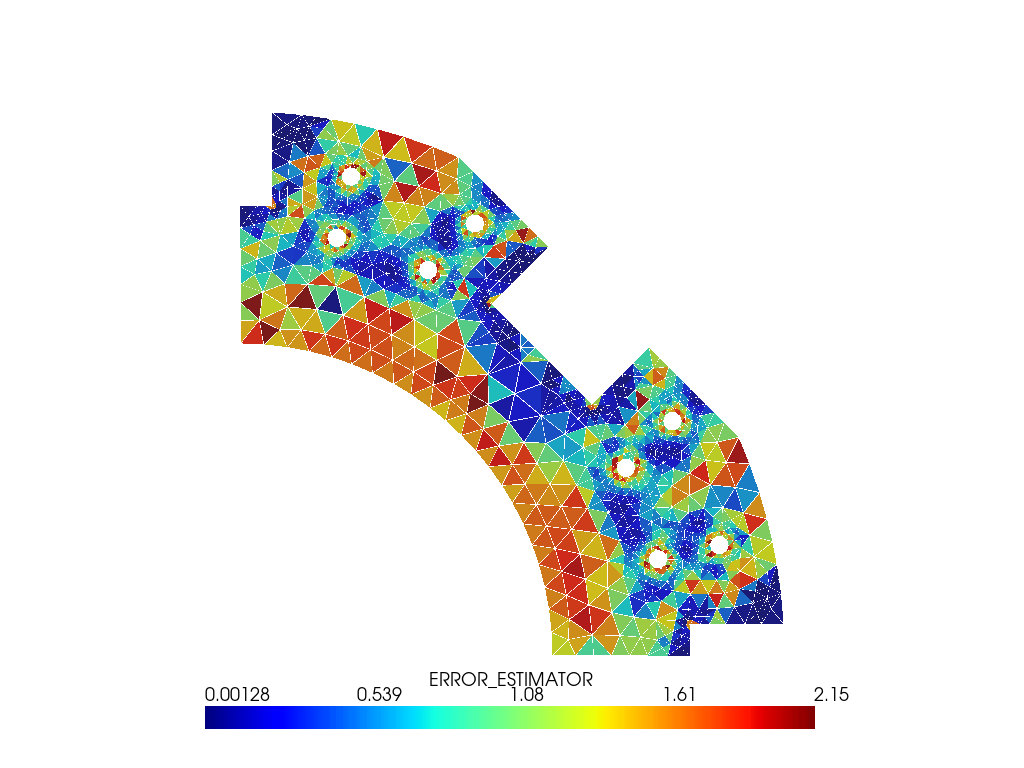

ERROR_INDICATOR_DIV


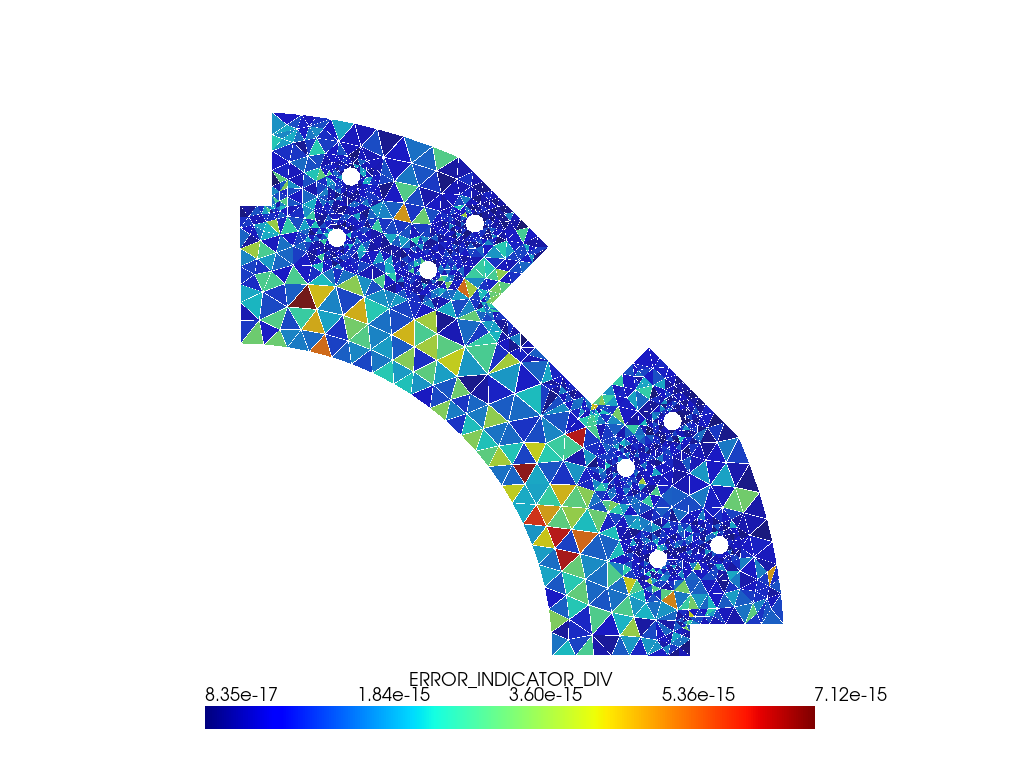

ERROR_INDICATOR_GRAD


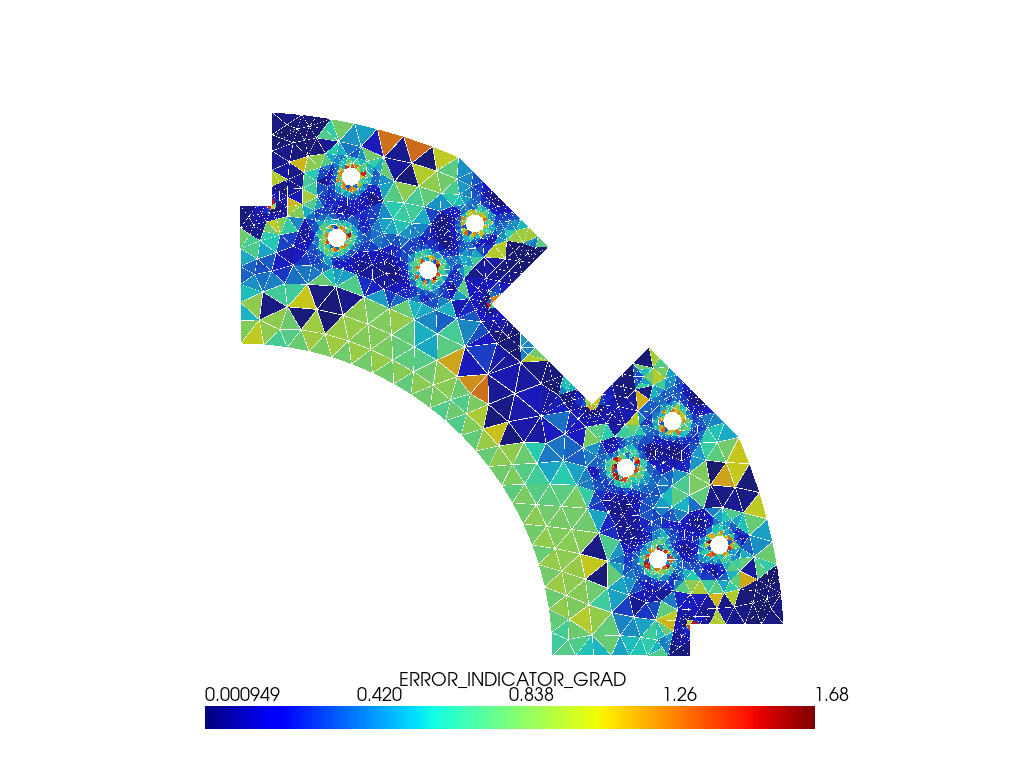

JUMP_L2


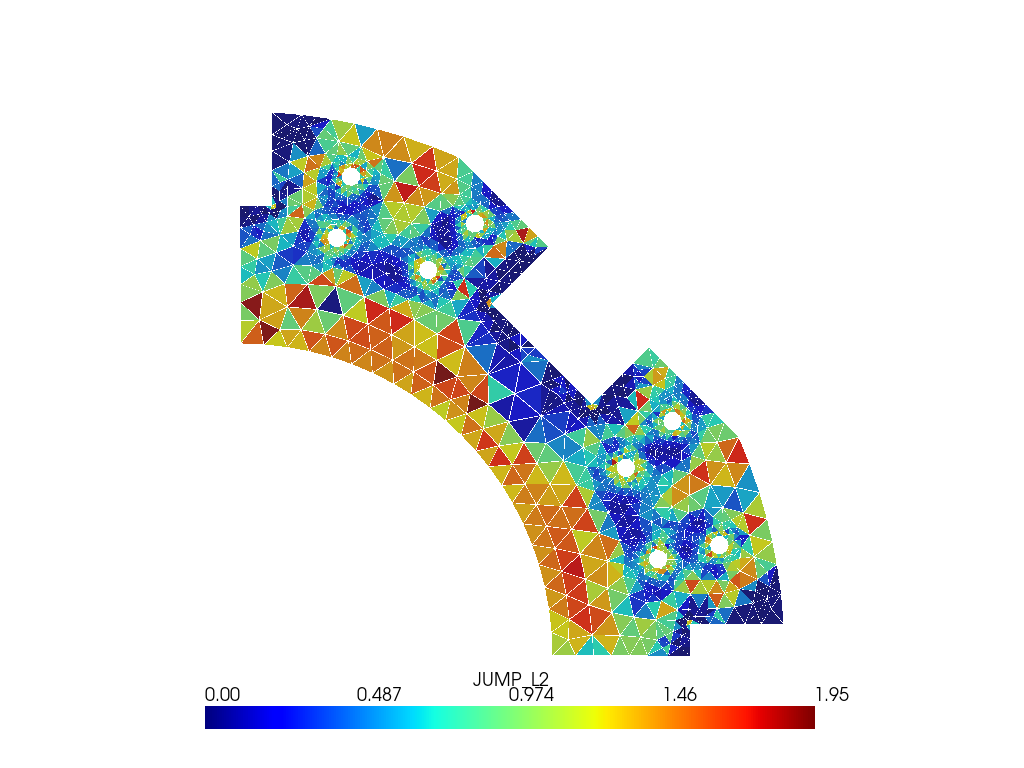

JUMP_L2


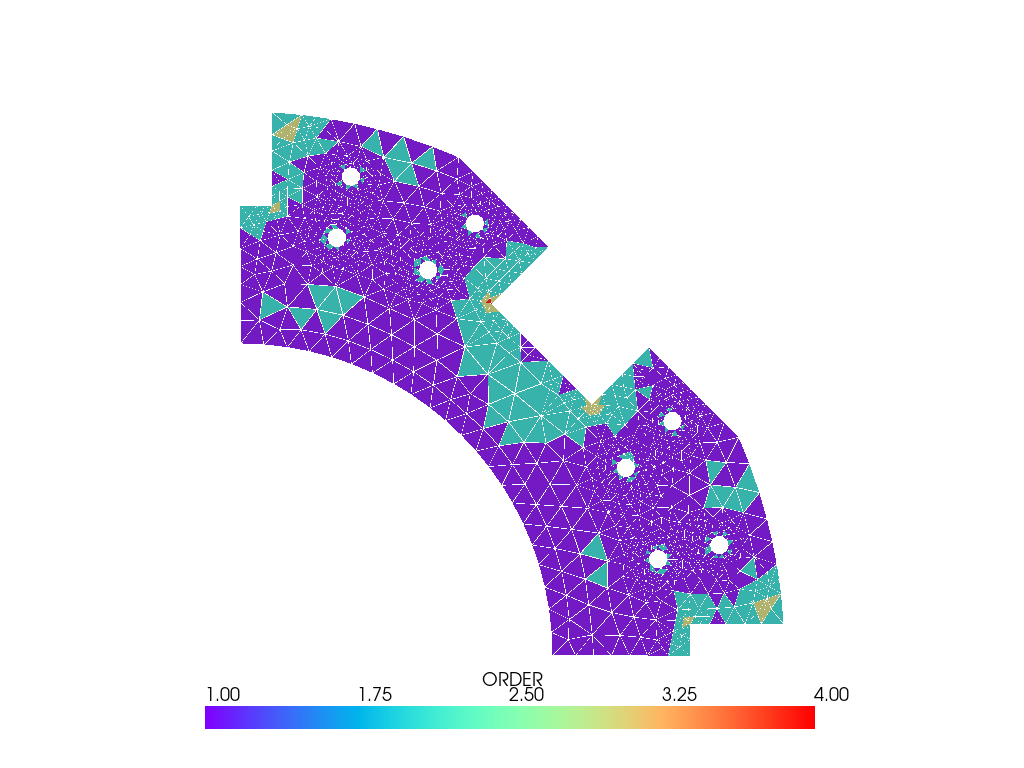

In [ ]:
# import settings and functions
color_lims = True
%run ./../plot_for_hdiv_errors.ipynb

plotting results for Temperature


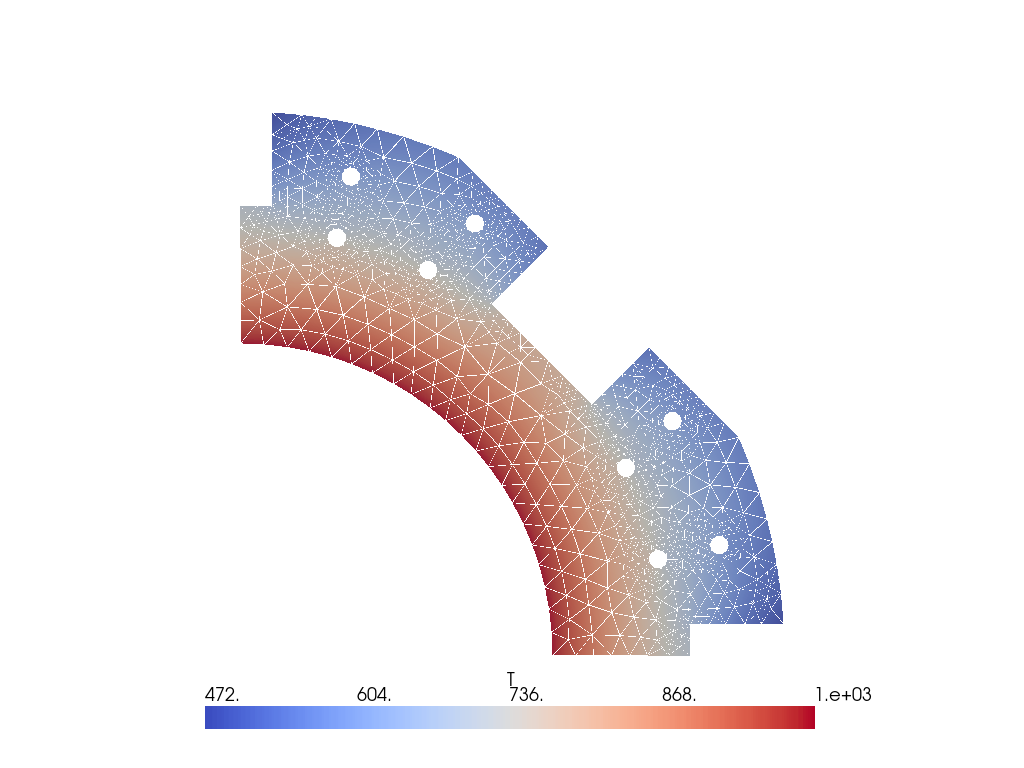

plotting results for grad(T)


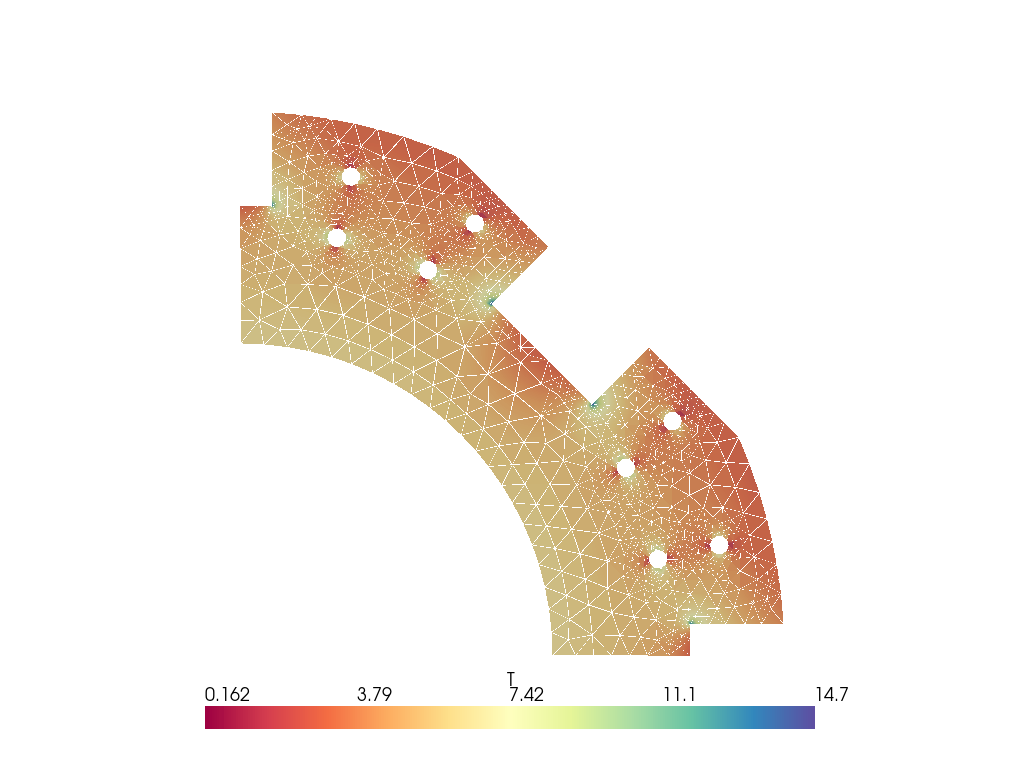

plotting results for Gradient


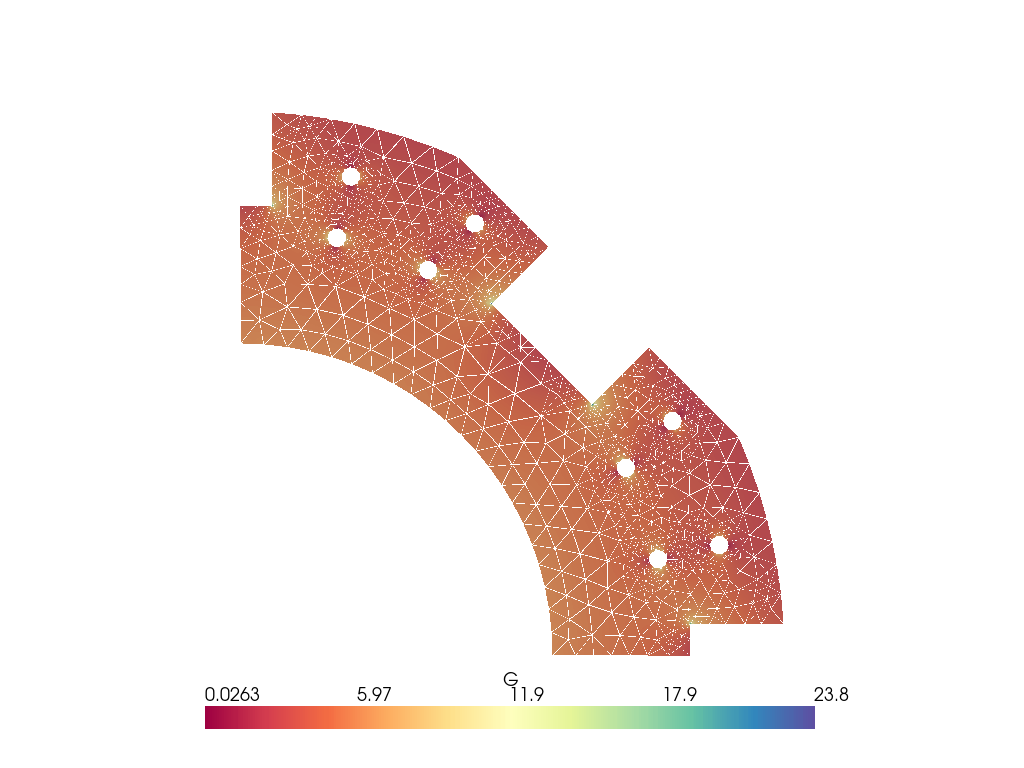

plotting results for Flux (result scale)


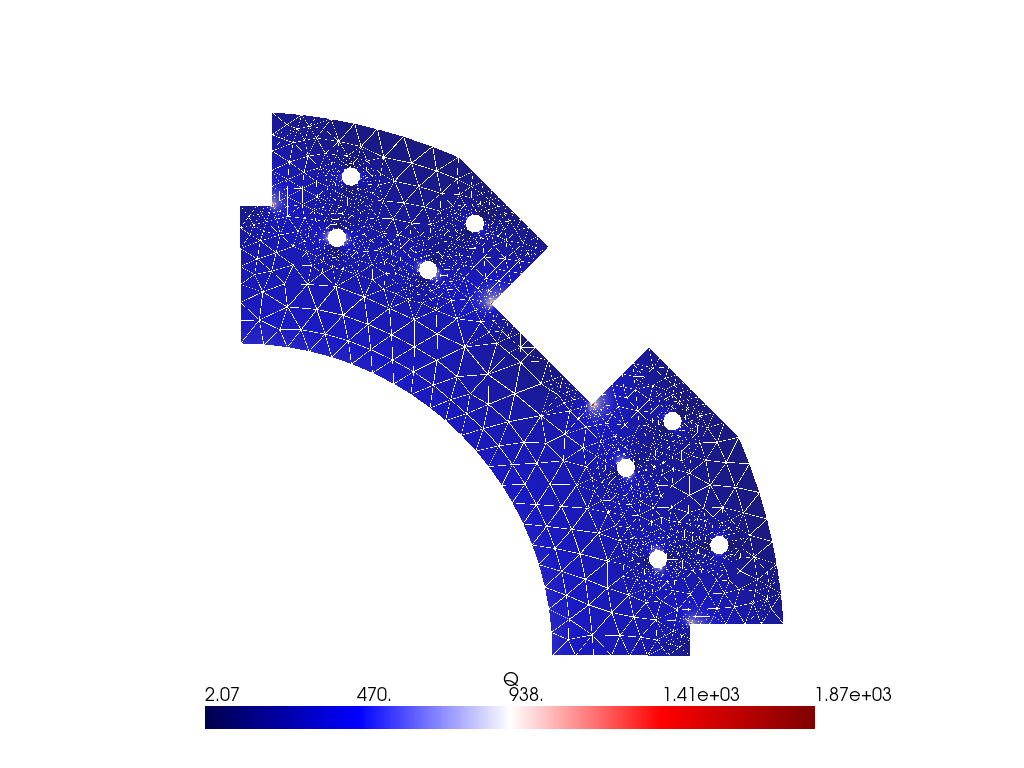

plotting results for Flux (dataset scale)


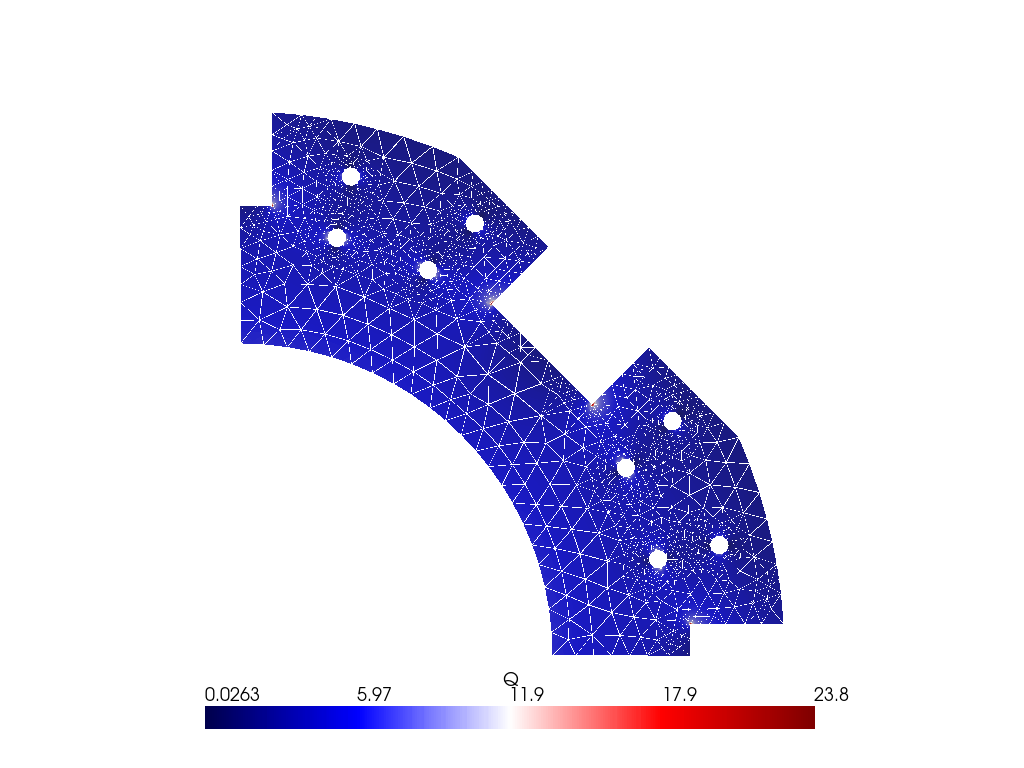

DD_DISTANCE_AVE


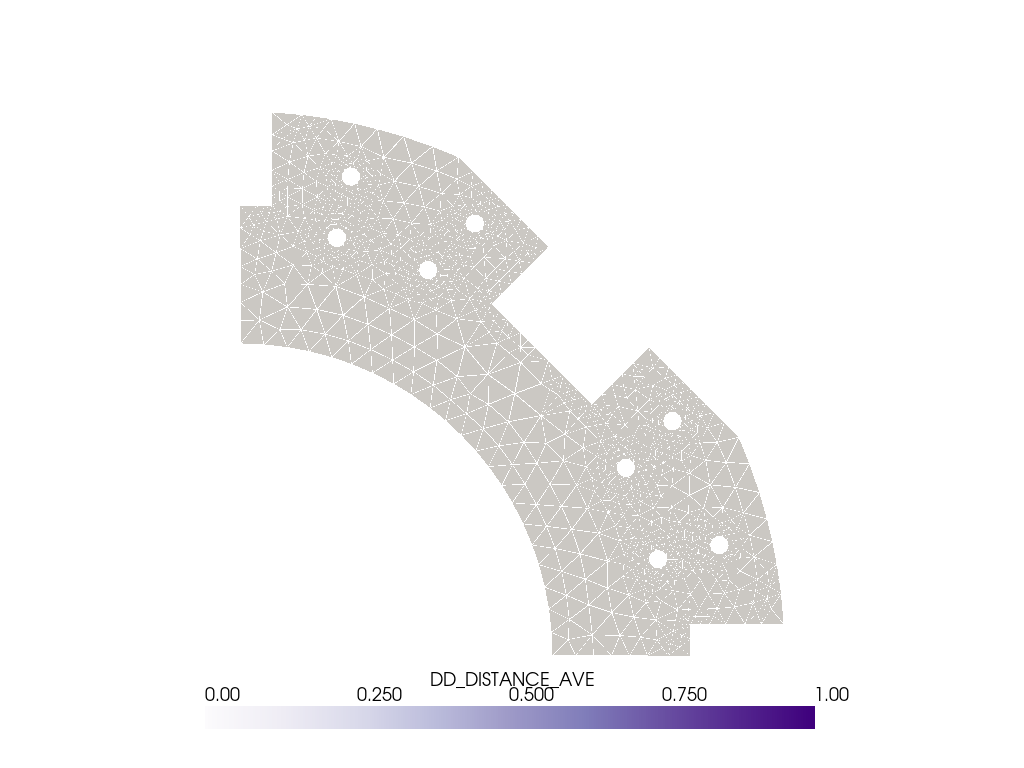

DD_DISTANCE_VAR


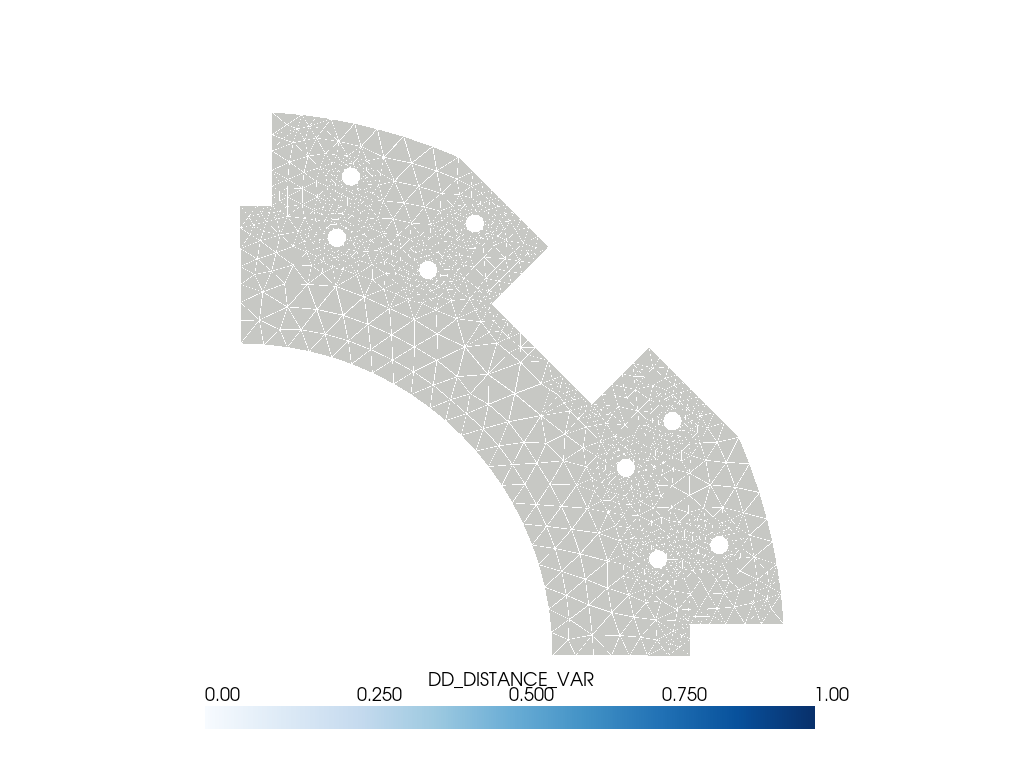

plotting results for Point_distance


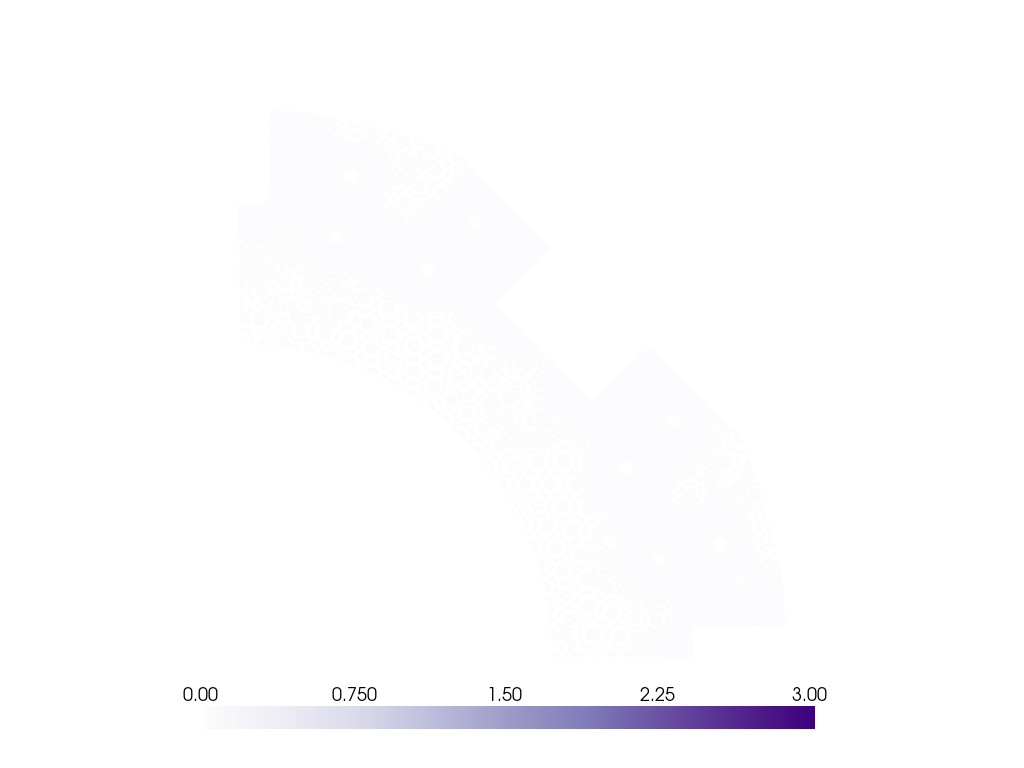

Q - Q_STAR (dataset scale)


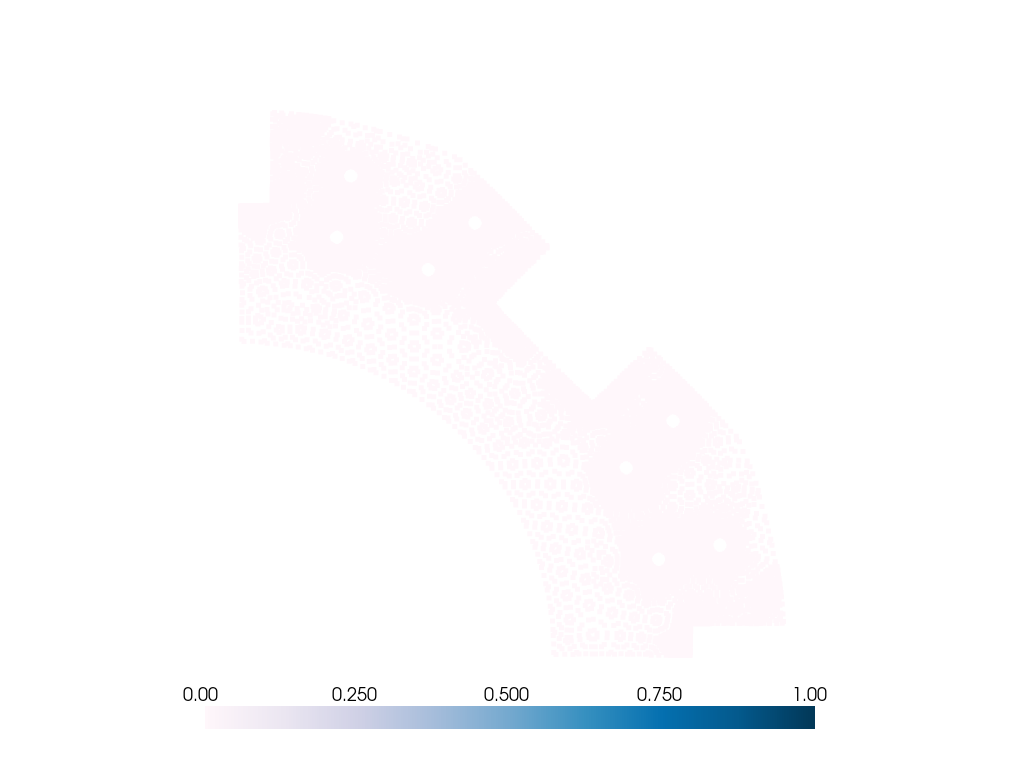

Q - Q_STAR (result scale)


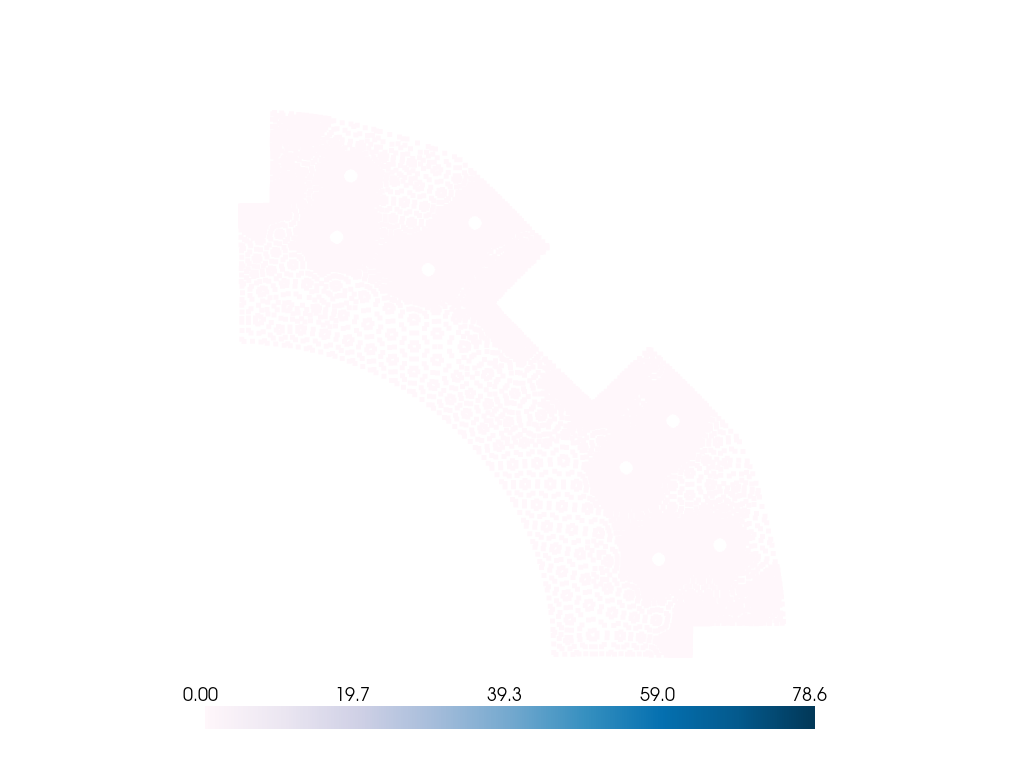

GRAD(P) - GRAD(P)_STAR


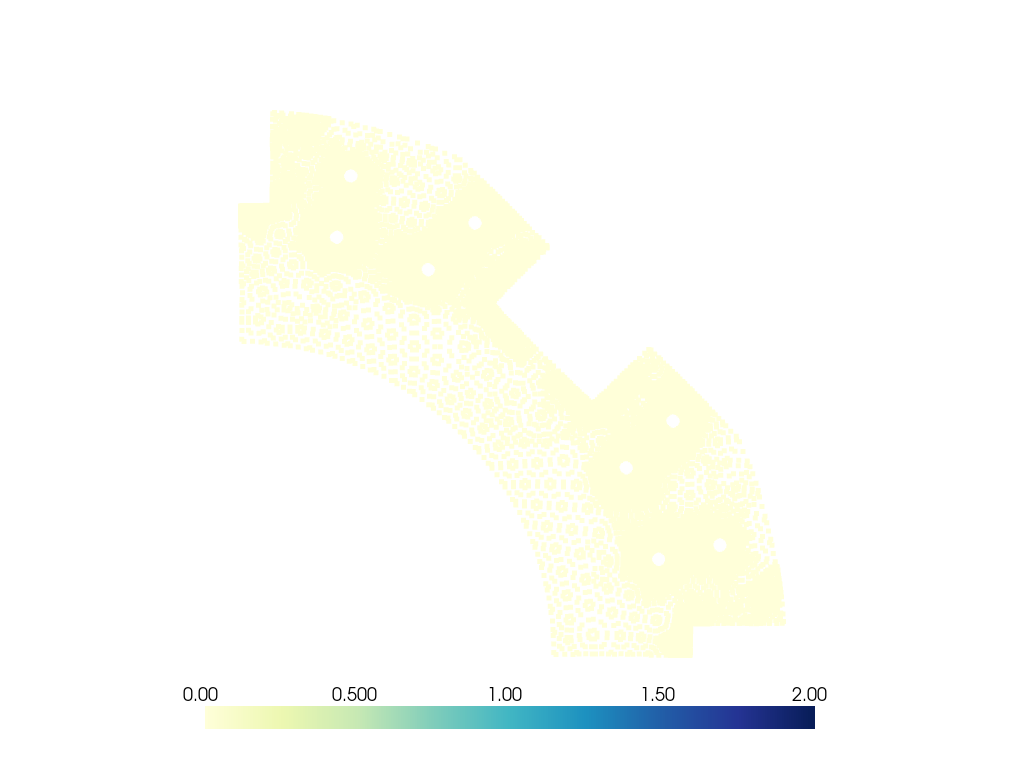

T - P_STAR (dataset scale)
Field 'P_STAR' not found in point data.
T - P_STAR (result scale)
Field 'P_STAR' not found in point data.


In [ ]:
# import settings and functions
%run ./../plot_for_DD.ipynb

In [ ]:
%run ./../../../create_gif.ipynb

In [ ]:
if get_gifs:

    # params.show_file = "out_error"
    # params.show_field = "ERROR_H1_SEMINORM"
    # params.show_edges = True
    # params.p_cmap = "rainbow"
    # params.p_cmap = "jet"
    # params.gif_name = "c5_hat_gif_h1_seminorm"
    # # params.p_save = "run_test_err_ind_grad.pdf"
    # print("0")
    # create_gif_from_vtk(params)

    params.show_file = "out_error"
    params.show_field = "ERROR_ESTIMATOR"
    params.show_edges = True
    params.p_cmap = "jet"
    # params.p_save = "c5_err_est.pdf"
    params.gif_name = "c5_hat_gif_err_est"
    create_gif_from_vtk(params)

    params.show_file = "out_error"
    params.show_field = "ERROR_INDICATOR_GRAD"
    params.show_edges = True
    params.warp_field_scalar = ""
    params.gif_name = "c5_hat_gif_err_ind_grad"
    create_gif_from_vtk(params)

    params.show_file = "out_error"
    params.show_field = "ERROR_INDICATOR_DIV"
    params.show_edges = True
    params.warp_field_scalar = ""
    params.gif_name = "c5_hat_gif_err_ind_div"
    create_gif_from_vtk(params)

    params.show_file = "out_error"
    params.show_field = "JUMP_L2"
    params.show_edges = True
    params.warp_field_scalar = ""
    params.gif_name = "c5_hat_gif_err_jump"
    create_gif_from_vtk(params)

    params.show_file = "out_error"
    params.show_field = "DD_DISTANCE_AVE"
    params.show_edges = True
    params.p_cmap = 'Purples'
    params.warp_field_scalar = ""
    params.gif_name = "c5_hat_gif_dist_ave"
    create_gif_from_vtk(params)

    params.show_file = "out_error"
    params.show_field = "DD_DISTANCE_VAR"
    params.p_cmap = "Blues"
    params.show_edges = True
    params.warp_field_scalar = ""
    params.gif_name = "c5_hat_gif_dist_var"
    create_gif_from_vtk(params)

    params.show_file = "out_error"
    params.show_field = "ORDER"
    params.p_cmap = "rainbow"
    params.show_edges = True
    params.warp_field_scalar = ""
    params.gif_name = "c5_hat_gif_order"
    create_gif_from_vtk(params)

    params.field_part = -1
    params.show_file = "out_ite"
    params.show_file = "out_resu*refi"
    params.show_field = "T"
    params.show_edges = True
    params.p_cmap = color_temperature
    params.gif_name = "c5_hat_gif_T"
    create_gif_from_vtk(params)

['out_error_0.vtk', 'out_error_1.vtk', 'out_error_2.vtk', 'out_error_3.vtk', 'out_error_4.vtk']


/tmp/ipykernel_2811653/800912153.py:70: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
/tmp/ipykernel_2811653/800912153.py:75: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (800, 600) to (800, 608) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


['out_error_0.vtk', 'out_error_1.vtk', 'out_error_2.vtk', 'out_error_3.vtk', 'out_error_4.vtk']


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (800, 600) to (800, 608) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


['out_error_0.vtk', 'out_error_1.vtk', 'out_error_2.vtk', 'out_error_3.vtk', 'out_error_4.vtk']


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (800, 600) to (800, 608) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


['out_error_0.vtk', 'out_error_1.vtk', 'out_error_2.vtk', 'out_error_3.vtk', 'out_error_4.vtk']


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (800, 600) to (800, 608) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


['out_error_0.vtk', 'out_error_1.vtk', 'out_error_2.vtk', 'out_error_3.vtk', 'out_error_4.vtk']


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (800, 600) to (800, 608) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


['out_error_0.vtk', 'out_error_1.vtk', 'out_error_2.vtk', 'out_error_3.vtk', 'out_error_4.vtk']


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (800, 600) to (800, 608) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


['out_error_0.vtk', 'out_error_1.vtk', 'out_error_2.vtk', 'out_error_3.vtk', 'out_error_4.vtk']


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (800, 600) to (800, 608) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


['out_result_refined_0.vtk', 'out_result_refined_1.vtk', 'out_result_refined_2.vtk', 'out_result_refined_3.vtk', 'out_result_refined_4.vtk']


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (800, 600) to (800, 608) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
